# EDA On Haberman's Survival Data Set.

`
Haberman's Survival Data Set:
`

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [5]:
### Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
### Loading the dataset
df = pd.read_csv("haberman.csv")
df.head()

,Age,Year,No.of Pos Axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


There are 4 attributes in the dataset:

1. `Age:` Age of patient at time of operation (numerical)

2. `Year:` Patient's year of operation (year - 1900, numerical)

3. `Nodes:` Number of positive axillary nodes detected (numerical)

4. `Status:` Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [7]:
print(f"Total datapoint: {df.shape[0]}")

Total datapoint: 306


There are 306 datapoints

## EDA:
We will mostly do univariate and bivariate analysis to understand which features are useful to clasify the survival status.\
In the uni-variate analysis, we will:
1. Compute the PDF and CDF for each feature.
2. Compute the mean, median and standard deviation for each feature.
3. Compute the IQR for each feature.
4. Compute the box plot for each feature.
5. Compute the violin plot for each feature.

In the bi-variate analysis, we will:
1. Compute the pair plots for all the features.
2. Compute the correlation matrix for all the features.

Lets's see the datapoint distribution across the two classes.

<Axes: title={'center': 'Distribution of Survival Status'}, xlabel='Survival Status', ylabel='count'>

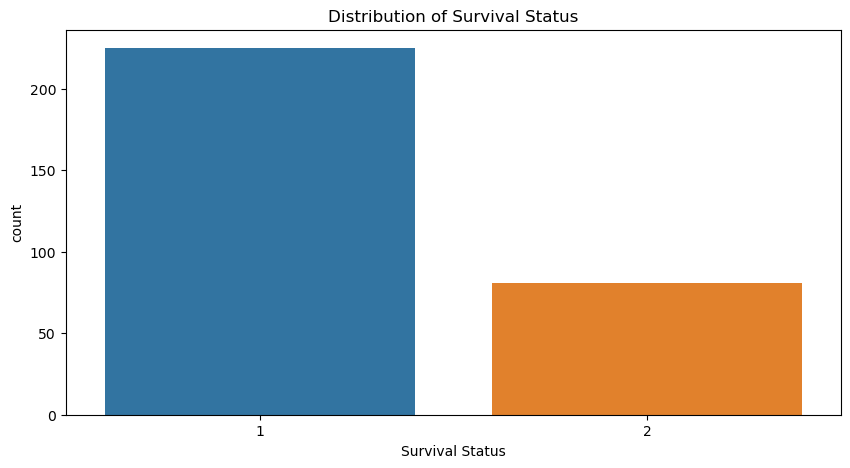

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Distribution of Survival Status")
sns.countplot(x="Survival Status", data=df)

**Observation:**\
As we can see the dataset is not balanced. There are 225 datapoints of class 1 and only 81 datapoints of class 2. So if we are building a model to predict the survival status of a patient, we need to keep in mind that the model will be `biased towards class 1.`

In [9]:
df.describe()

,Age,Year,No.of Pos Axillary nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
### IQR Range
print(f"Age IQR: {np.percentile(df['Age'], 75) - np.percentile(df['Age'], 25)}")
print(f"Year of Operation IQR: {np.percentile(df['Year'], 75) - np.percentile(df['Year'], 25)}")
print(f"Auxillary Nodes IQR: {np.percentile(df['No.of Pos Axillary nodes'], 75) - np.percentile(df['No.of Pos Axillary nodes'], 25)}")

Age IQR: 16.75
Year of Operation IQR: 5.75
Auxillary Nodes IQR: 4.0


**Observation:**\
We can see that the IQR for the feature 'Age' is greater than the IQR for the feature 'Year'. This indicates that the datapoints are more spread out for the feature 'Age' than the feature 'Year'. This can also be seen in the box plot and violin plot. The IQR for the feature 'Auxillary Nodes' is very small. This indicates that most of the datapoints are concentrated in a small range. The observation is same for the standard deviation

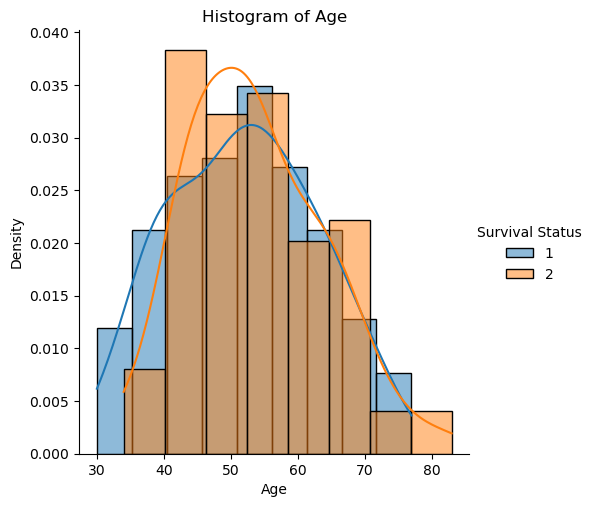

[16 27 46 53 55 41 41 18  7  2]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


In [17]:
## Histogram
sns.FacetGrid(df, hue="Survival Status", height=5) \
    .map(sns.histplot, "Age", kde=True, stat="density") \
    .add_legend()
plt.title("Histogram of Age")
plt.show()

count, edge=np.histogram(df["Age"], bins=10)
print(count)
print(edge)


**Observation:**\
From the histogram , we can see that people of age 30 to 40 has more change of survival. People of age 40 to 50 has less change of survival as the density of not survived is more than survived. People of age 50 to 60 has equal change of survival and not survival. People of age 60 to 70 has less change of survival as the density of not survived is more than survived. People of age 70 to 80 has more change of survival as the density of survived is more than not survived.

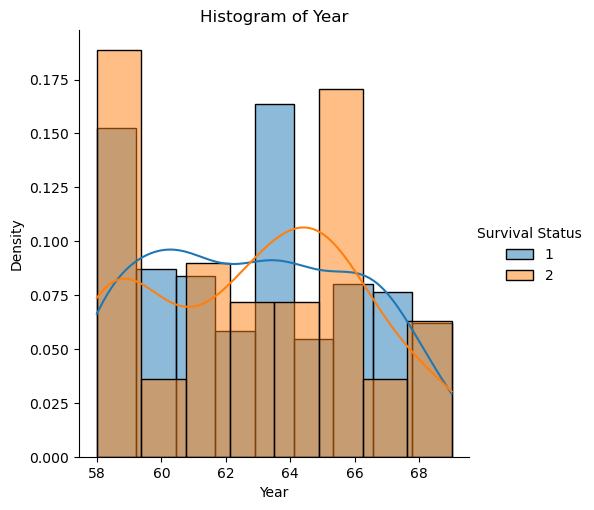

In [18]:
sns.FacetGrid(df, hue="Survival Status", height=5) \
    .map(sns.histplot, "Year", kde=True, stat="density") \
    .add_legend()
plt.title("Histogram of Year")
plt.show()


**Observation:**\
From the histogram , we can see that peopl who had undergone surgery from the year 1960 to 1965 has more change of survival than the people who had undergone surgery before that.

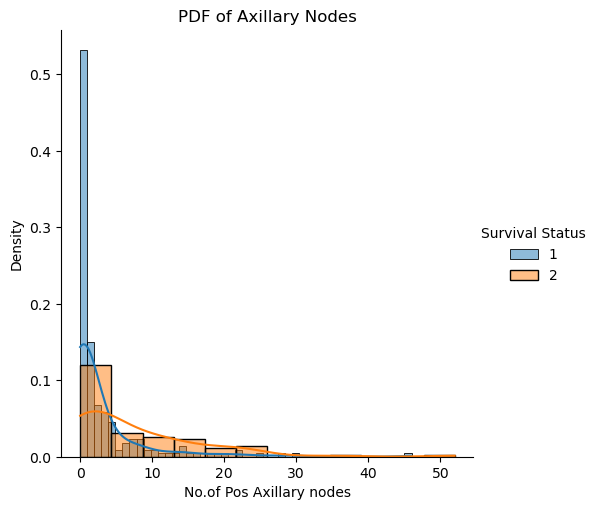

In [13]:
sns.FacetGrid(df, hue="Survival Status", height=5) \
    .map(sns.histplot, "No.of Pos Axillary nodes", kde=True, stat="density") \
    .add_legend()
plt.title("PDF of Axillary Nodes")
plt.show()

**Observation:**\
From the histogram, it is implying that the people who had auxillary nodes less than 3 has great change of survival. People who had auxillary nodes more than 3 has change of not survival.

## Box plot:

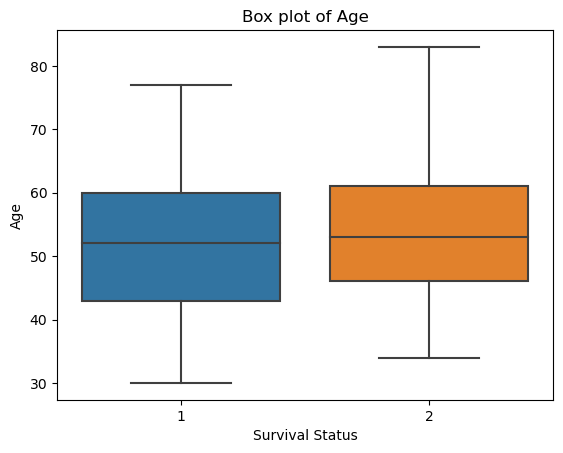

In [14]:
## Box plot of Age
sns.boxplot(x="Survival Status", y="Age", data=df)
plt.title("Box plot of Age")
plt.show()

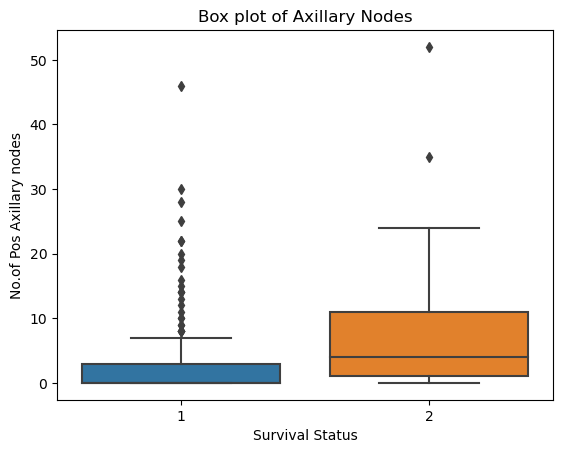

In [15]:
## Box plot of Axillary nodes
sns.boxplot(x="Survival Status", y="No.of Pos Axillary nodes", data=df)
plt.title("Box plot of Axillary Nodes")
plt.show()

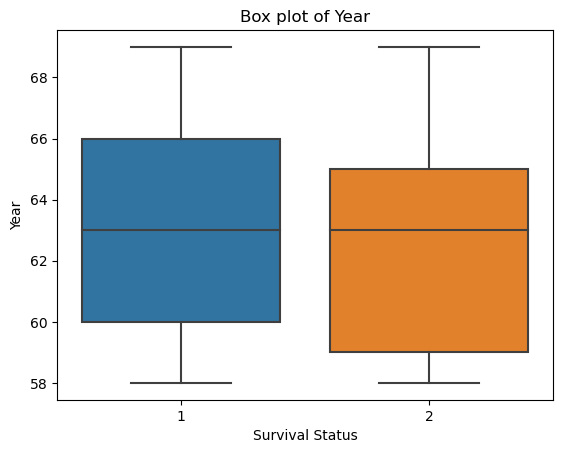

In [20]:
## Box plot of Year
sns.boxplot(x="Survival Status", y="Year", data=df)
plt.title("Box plot of Year")
plt.show()

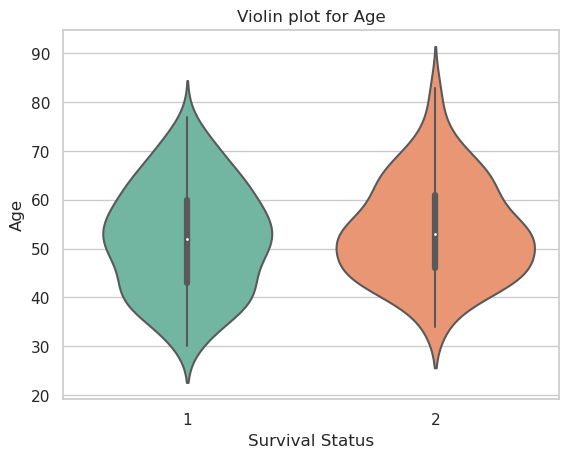

In [ ]:
## Violin plot:
sns.violinplot(x="Survival Status", y="Age", data=df)
plt.title("Violin plot for Age")
plt.show()

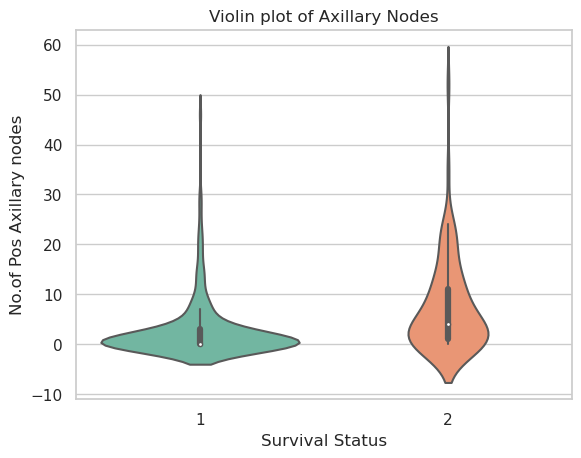

In [ ]:
sns.violinplot(x="Survival Status", y="No.of Pos Axillary nodes", data=df)
plt.title("Violin plot of Axillary Nodes")
plt.show()

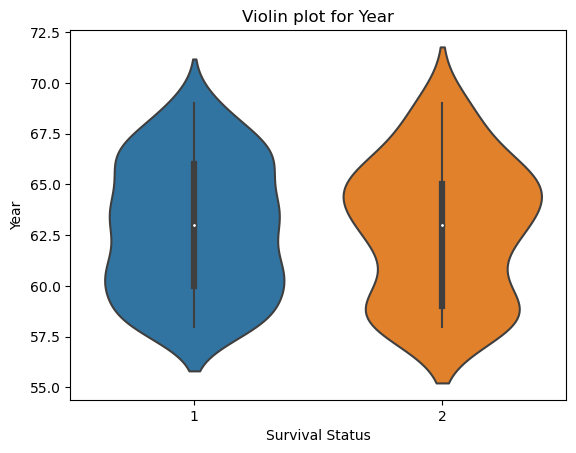

In [ ]:
sns.violinplot(x="Survival Status", y="Year", data=df)
plt.title("Violin plot for Year")
plt.show()

**Observation**\
About 50% of the people who survived , their age is between 43 to 60.\
On the other hand, about 50% of the people who did not survive , their age is between 46 to 61.\
The median age of people who survived is 52 and the median age of people who did not survive is 53.\
The mean age of people who survived is 52.02 and the mean age of people who did not survive is 53.68.\
We can see that the mean and median age of people who survived is less than the mean and median age of people who did not survive. We can implying that the chances of survival is more for the people who are younger.


The median of axilllary nodes of people who survived is 0 and the median of axillary nodes of people who did not survive is 4.\
The mean of axilllary nodes of people who survived is 2.79 and the mean of axillary nodes of people who did not survive is 7.45.\
Here, the pattern suggests that the people who survived has very less axillary nodes, close to 0, but the people who did not survive has more axillary nodes.

The survival of people who had undergone surgery before 1960 is very low as the graph suggests.\
We can see that that the median of the year of operation of people who survived and couldn't survive is same. This implies that before 1960, there could have some issues with the method of treatment but after 1963, we can see that the year of operation almost does not have any effect on the survival of the patient. So we can satistically infer that the survival of the patient does not depend on the year of operation after 1963.

## PDF and CDF:

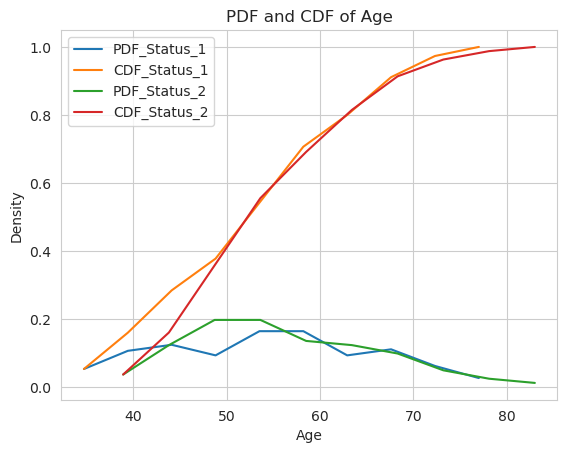

In [32]:
# PDF AND CDF
counts, bin_edges = np.histogram(df['Age'].loc[df['Survival Status'] == 1], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF_Status_1")
plt.plot(bin_edges[1:], cdf, label="CDF_Status_1")

counts, bin_edges = np.histogram(df['Age'].loc[df['Survival Status'] == 2], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF_Status_2")
plt.plot(bin_edges[1:], cdf, label="CDF_Status_2")
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("PDF and CDF of Age")
plt.legend()
plt.show()

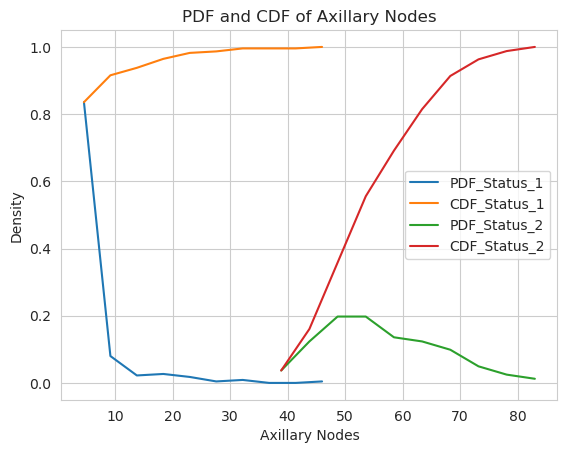

In [33]:
counts, bin_edges = np.histogram(df['No.of Pos Axillary nodes'].loc[df['Survival Status'] == 1], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF_Status_1")
plt.plot(bin_edges[1:], cdf, label="CDF_Status_1")

counts, bin_edges = np.histogram(df['Age'].loc[df['Survival Status'] == 2], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF_Status_2")
plt.plot(bin_edges[1:], cdf, label="CDF_Status_2")

plt.xlabel("Axillary Nodes")
plt.ylabel("Density")
plt.title("PDF and CDF of Axillary Nodes")
plt.legend()
plt.show()

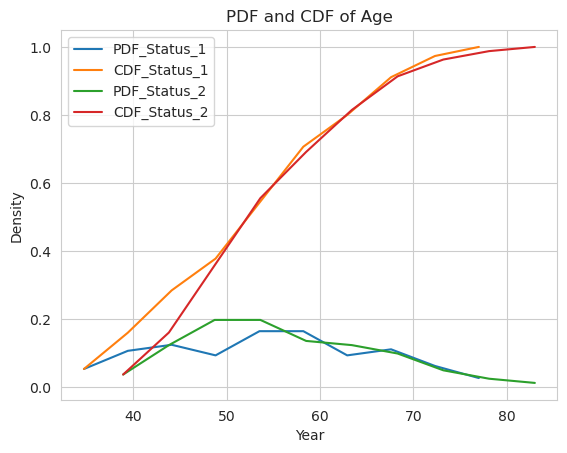

In [34]:
counts, bin_edges = np.histogram(df['Age'].loc[df['Survival Status'] == 1], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF_Status_1")
plt.plot(bin_edges[1:], cdf, label="CDF_Status_1")

counts, bin_edges = np.histogram(df['Age'].loc[df['Survival Status'] == 2], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF_Status_2")
plt.plot(bin_edges[1:], cdf, label="CDF_Status_2")

plt.xlabel("Year")
plt.ylabel("Density")
plt.title("PDF and CDF of Age")
plt.legend()
plt.show()

# Bivariate Analysis:

## Pairplots

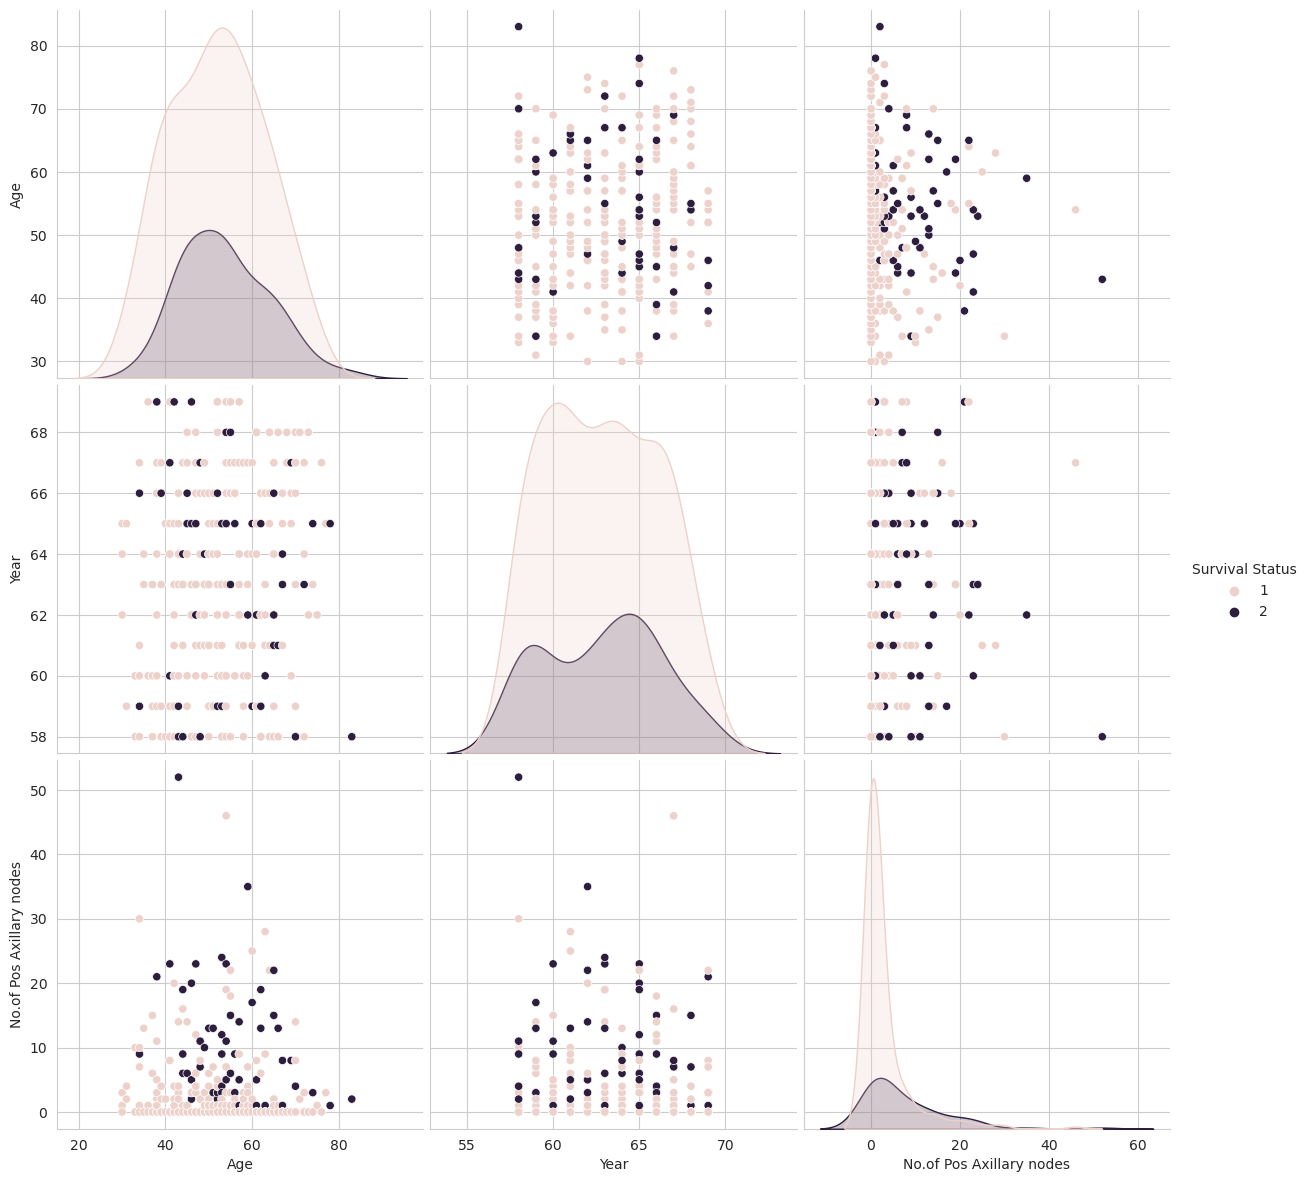

In [21]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Survival Status', height = 4)
plt.show()

**Observation:**\
Most of the datapoints are overlapping and non linearl. So it is difficult to classify the datapoints using a line.\
The feature 
1. When the 'age' is less than 40 and year of surgery is between 1960 and 1965, there are is good chance of survival after the surgery.
2. Number of auxillary nodes is less than 3, and the age is less than 50, there are change of survival, although the datapoints are overlapping after the age of 40 and there is no linear relation between the features.
3. The year and auxiillary node is overlapping. It is hard to make decision from this plot.

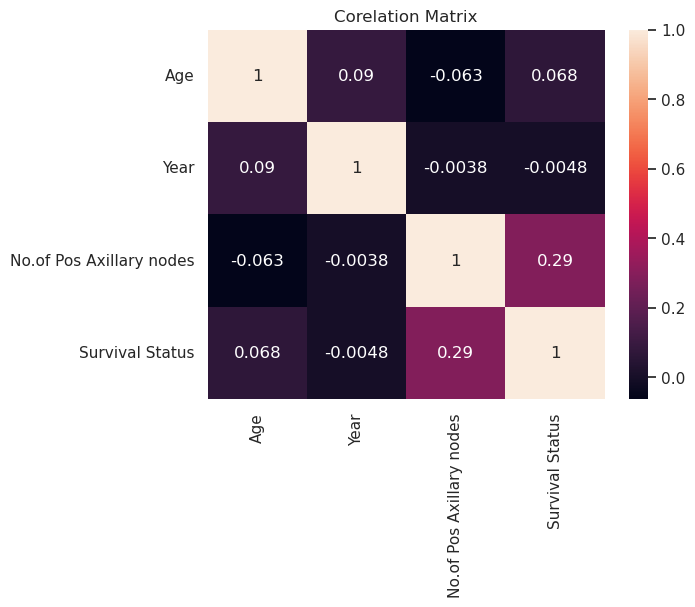

In [ ]:
# Corelation Matrix
sns.heatmap(df.corr(), annot=True, robust=True)
plt.title("Corelation Matrix")
plt.show()

**Observation:**\
From the correlation matrix,\
1. There are no correlation between most of the features.\
2. There is a correlation between Axillary nodes and Survival status.\
3. The correlation between the features are very low. So we cannot make any decision based on the correlation matrix.